# Dataset Importing
Our dataset is about the CO2 emissions of all the cars that came out in 2013. the source of our dataset is [European Environment Agency's data hub](https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-20)

We download the above dataset, read its csv and store in a `df` variable and rename its columns to increase the readablity of that. **the name of columns** have been extracted from **"Guidelines on the monitoring and reporting of CO2 emissions from light-duty vehicles"**.

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

df = pd.read_csv("./dataset/CO2_passenger_cars_v8.csv", na_values=[' '], low_memory=False)
df = df.set_index('id')

column_names = {
    "MS": "member_state",
    "MP": "mp",
    "Mh": "mh",
    "MAN": "man",
    "MMS": "mms",
    "TAN": "type_approval_number",
    "T": "type",
    "Va": "variant",
    "Ve": "version",
    "Mk": "make",
    "Cn": "commercial_name",
    "Ct": "category",
    "r": "registration",
    "e (g/km)": "emmition", # Min = 0, Max = 700
    "m (kg)": "mass", # Min = 300, Max = 5000
    "w (mm)": "wheelbase", # Min = 500, Max = 6000
    "at1 (mm)": "at1", # Min = 500, Max = 3000
    "at2 (mm)": "at2", # Min = 500, Max = 3000
    "Ft": "fuel_type",
    "Fm": "fuel_mode",
    "ec (cm3)": "engine_capacity",
    "ep (KW)": "engine_power",
    "z (Wh/km)": "electric_energy_consumption",
    "IT": "eco_innovations", # Min = 3
    "Er (g/km)": "emissions_reduction", #"emissions reduction due to an innovative technology",
}


df = df.rename(columns=column_names)


Check out the columns's **Non-null count** and **Dtype**:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442475 entries, 1 to 442475
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_state                 442475 non-null  object 
 1   mp                           351252 non-null  object 
 2   mh                           442475 non-null  object 
 3   man                          442475 non-null  object 
 4   mms                          401876 non-null  object 
 5   type_approval_number         414056 non-null  object 
 6   type                         439245 non-null  object 
 7   variant                      428295 non-null  object 
 8   version                      417864 non-null  object 
 9   make                         422174 non-null  object 
 10  commercial_name              441330 non-null  object 
 11  category                     442470 non-null  object 
 12  registration                 442475 non-null  int64  
 13  emmi

### Cleaning Qualitative Columns

Some problems like the following cases have been observed in the qalitative columns (non-number columns with types such as object, string, category):

- **Typos:**  `'MERCDES BENZ'`
- **Labels with double spaces between them:** `'VOLKSWAGEN,  VW'`
- **Multi-label for one entity:**     `'ASTON-MARTIN'` and `'ASTONMARTIN'` will be replaced with `'ASTON MARTIN'`
- **Non standard characters in labels:** `?` in `'DODGE?'`
- ...



In [42]:
make_values = {
    'ASTON-MARTIN': 'ASTON MARTIN',
    'ASTONMARTIN': 'ASTON MARTIN',

    'AUTOMOBILES PEUGEOT': 'PEUGEOT',

    'BMW AG': 'BMW',
    'BMW I': 'BMW',

    'CHRVROLET': 'CHEVROLET',

    'CITROËN': 'CITROEN',

    'DAIMLER AG': 'DAIMLER',

    'DODGE (USA)': 'DODGE',
    'DODGE?': 'DODGE',

    'DONKERVOORT': 'DONKERVOORT(JD)',

    'FISKER AUTOMOTIVE INC.': 'FISKER',

    'FORD (D)': 'FORD',
    'FORD - CNG-TECHNIK': 'FORD',
    'FORD-CNG-TECHNIK': 'FORD',

    'GENERAL MOTORS COMPANY': 'GMC',

    'JAGUAR CARS LIMITED': 'JAGUAR CARS',
    'JAGUAR': 'JAGUAR CARS',

    'JAGUAR LAND ROVER LIMITED': 'JAGUAR LAND ROVER',
    'JAGUAR LAND ROVER LTD': 'JAGUAR LAND ROVER',
    'JAGUAR LAND ROVERLIMITED': 'JAGUAR LAND ROVER',

    'KIA MOTOR': 'KIA',

    'LADA - VAZ': 'LADA-VAZ',
    'LADA': 'LADA-VAZ',

    'LAND ROVER LD': 'LAND ROVER', 
    'LANDROVER ': 'LAND ROVER',

    'MAHINDRA LTD.': 'MAHINDRA',

    'MC LAREN': 'MCLAREN',
    
    'MERCEDES-BENZ': 'MERCEDES BENZ',
    'MERCEDES BENZ': 'MERCEDES BENZ',
    'MERCDES BENZ': 'MERCEDES BENZ',
    'MERCEDES AMG': 'MERCEDES BENZ',
    'MERCEDES-AMG': 'MERCEDES BENZ',
    'MERCEDES': 'MERCEDES BENZ',

    'MITSUBISHI MOTORS CORPORATION': 'MITSUBISHI',
    'MITSUBISHI (J)': 'MITSUBISHI',
    'MITSUBISHI (THA)': 'MITSUBISHI MOTORS THAILAND',

    'MORGAN': 'MORGAN MOTOR',

    'OLKSWAGEN': 'VOLKSWAGEN VW',
    'OLKSWAGEN VW': 'VOLKSWAGEN VW',

    'VOLKSWAGEN,  VW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN, VW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN  COMM': 'VOLKSWAGEN VW',
    'VOLKSWAGEN,VW': 'VOLKSWAGEN VW',
    'VOLKSWAGENVW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN': 'VOLKSWAGEN VW',
    
    'PEUGOT': 'PEUGEOT',
    'AUTOMOBILES PEUGEOT': 'PEUGEOT',

    'PORCHE': 'PORSCHE',

    'QUATRO': 'QUATTRO',

    'ROLLS-ROYCE': 'ROLLS ROYCE',

    'ROVER': 'ROVER CARS',

    'SSANG YONG': 'SSANGYONG',
    'SSANGJONG': 'SSANGYONG',

    'SUZUKI MOTOR CORPORATION': 'SUZUKI',
    'TESLA': 'TESLA MOTORS',
}

df.make = df.make.str.upper() # A few of labels are lowercase while the majority are upperase. convert all of them to uppercase
df.make = df.make.replace(make_values) # Correct the observed problms

df.fuel_type = df.fuel_type.str.upper() # A few of labels are lowercase while the majority are upperase. convert all of them to uppercase

df.man = df.man.str.strip() # Remove space from the end of strings such as 'JAGUAR LAND ROVER LIMITED '
df.fuel_type = df.fuel_type.str.strip()


# Set the right types to the columns:

df.member_state = df.member_state.astype('category')
df.mh = df.mh.astype('category')
df.man = df.mh.astype('category')
df.type = df.type.astype('category') # Needs cleaning
df.variant = df.variant.astype('category') # Needs cleaning
df.version = df.version.astype('category') # Needs cleaning
df.make = df.make.astype('category') # Needs cleaning
df.commercial_name = df.commercial_name.astype('string') # This may be a good choice to drop
df.category = df.category.astype('category') # 3 categries
df.fuel_type = df.fuel_type.astype('category')
df.fuel_mode = df.fuel_mode.astype('category')
df.eco_innovations = df.eco_innovations.astype('category')

# Rename the labels to increase the readabilty during visualization
df.fuel_mode = df.fuel_mode.cat.rename_categories({'M': 'mono-fuel', 'B': 'bi-fuel', 'F': 'flex-fuel'})


Replacing missing values in some columns by methods like computing mean, mode, ... doesn't mak sence as the missing values count are too high:

In [43]:
df = df.drop('mp', axis=1) # too many missing values
df = df.drop('mms', axis=1) # too many missing values
df = df.drop('type_approval_number', axis=1) # too many missing values


Devide the data frame `df` to 2 parts, one for **qualitative** columns, the other one **qantative** columns and check the **missing values count** of each column:

In [10]:
# Divide df to quality and quantity dfs
quality_df = df.select_dtypes(['string', 'object', 'category'])
numeric_df = df.select_dtypes(['int64', 'float64'])

print("\nMissing values of qualitive columns:\n")
print(quality_df.isnull().sum())

print("\nMissing values of quantity columns:\n")
print(numeric_df.isnull().sum())



Missing values of qualitive columns:

member_state                 0
mp                       91223
mh                           0
man                          0
mms                      40599
type_approval_number     28419
type                      3230
variant                  14180
version                  24611
make                     20301
commercial_name           1145
category                     5
fuel_type                15169
fuel_mode                20746
eco_innovations         442473
dtype: int64

Missing values of quantity columns:

registration                        0
emmition                         1332
mass                             1083
wheelbase                       20607
at1                             27052
at2                             71281
engine_capacity                  5332
engine_power                    78518
electric_energy_consumption    441845
emissions_reduction            442473
dtype: int64


The correlation heatmap of quantative columns shows that there are a strong correlation of the columns `mass`, `engine capacity` and `engine power` with `emissions`. this correlation totally makes sence as a car with higher mass, needs a more powerful engine in terms of capacity and power, that results in consuimg more fuel and emitting more CO2 emissions:

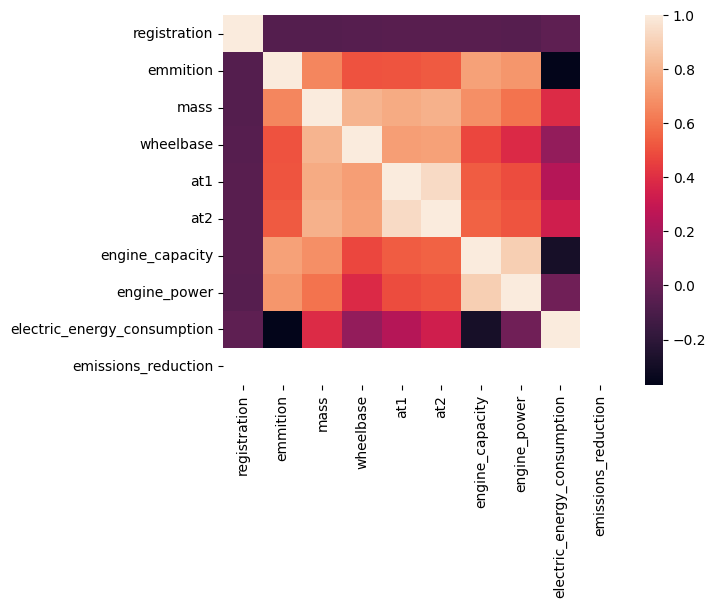

In [49]:
corr = numeric_df.corr()
sb.heatmap(corr)
plt.show()

In [52]:
cov = numeric_df.cov()
cov
#sb.heatmap(cov)
#plt.show()

registration      emmition           mass  \
registration                 30509.413915   -434.712051   -3678.123556   
emmition                      -434.712051   1469.156434    8072.614486   
mass                         -3678.123556   8072.614486  103718.092481   
wheelbase                    -2256.170335   3804.870964   54533.456764   
at1                           -679.321904   1196.507478   16179.125601   
at2                           -657.576837   1239.075794   16756.769990   
engine_capacity              -6651.176670  19727.614736  154664.232438   
engine_power                  -560.527847   1550.123876   11032.775279   
electric_energy_consumption   -344.739223   -224.258058    5082.322492   
emissions_reduction              0.000000      0.000000       0.000000   

                                wheelbase           at1           at2  \
registration                 -2256.170335   -679.321904   -657.576837   
emmition                      3804.870964   1196.507478   1239.075794   
mass                         54533.456764  16179.125601  16756.769990   
wheelbase                    45614.549257  10316.210424  10572.413103   
at1                          10316.210424   4401.233934   4073.500599   
at2                          10572.413103   4073.500599   4530.404905   
engine_capacity              65791.634635  22736.266875  23767.172264   
engine_power                  4190.322509   1570.036227   1672.462033   
electric_energy_consumption   1540.047141   1038.874326   1422.132569   
emissions_reduction              0.000000      0.000000      0.000000   

                             engine_capacity  engine_power  \
registration                    -6651.176670   -560.527847   
emmition                        19727.614736   1550.123876   
mass                           154664.232438  11032.775279   
wheelbase                       65791.634635   4190.322509   
at1                             22736.266875   1570.036227   
at2                             23767.172264   1672.462033   
engine_capacity                501594.931852  36825.576716   
engine_power                    36825.576716   3319.290760   
electric_energy_consumption     -8097.120210     32.633819   
emissions_reduction                 0.000000      0.000000   

                             electric_energy_consumption  emissions_reduction  
registration                                 -344.739223                  0.0  
emmition                                     -224.258058                  0.0  
mass                                         5082.322492                  0.0  
wheelbase                                    1540.047141                  0.0  
at1                                          1038.874326                  0.0  
at2                                          1422.132569                  0.0  
engine_capacity                             -8097.120210                  0.0  
engine_power                                   32.633819                  0.0  
electric_energy_consumption                  1181.786146                  NaN  
emissions_reduction                                  NaN                  0.0